In [9]:
# first compile the c modules where the model depends on
from  explain_core.ModulesCompiler import compile_modules;
compile_modules()

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from explain_core.helpers.Interface import Interface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# get a reference to all the submodels
models = model.models

# instantiate an interface object to interact with the model engine instance
neo = Interface(model)

# get a reference to the Pda model
pda = models["Pda"]

# enable or disable the physiological submodels
neo.ans(True)
neo.breathing(False)
neo.metabolism(False)
neo.mob(True)

# desiable the extra-corporeal submodels
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.artificial_whomb(False)

# stabilize by calculating 60 seconds with fixed resp_rate of 40/min, tidal volume of 16 ml and fixed heart rate of 140 / min
neo.calculate(60)

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 3.2 sec. Average model step in 0.0269 ms.


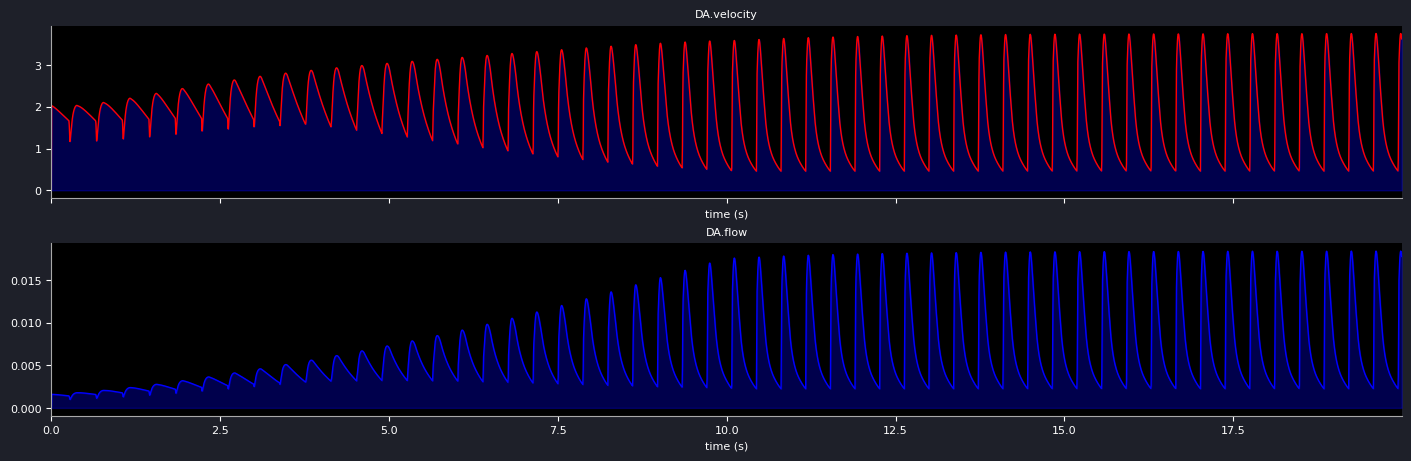


DA.velocity     : max    3.75025 min        0.0
Stroke volume calculation might be inaccurate. Try using a sampleinterval of 0.0005
DA.flow         : net  382.20417, forward  382.20417, backward        0.0 ml/min, stroke volume:    2.32205 ml, 


In [10]:
pda._pda.set_r_k(100000)
pda.open_ductus(in_time=10.0)

neo.plot_time_graph(["DA.velocity", "DA.flow"], time_to_calculate=20, combined=False, sharey=False)

In [3]:
pda.close_ductus(in_time=10.0)
neo.fastforward(20)

 Ready in 1.2 sec. Average model step in 0.0305 ms.


In [ ]:
neo.plot_time_graph(["DA.velocity"], time_to_calculate=10)